Nome: Francisco Jerônimo da Silva Júnior <br>
Matrícula: 433399

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.datasets import load_boston

from sklearn.model_selection import train_test_split

from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

### Leitura dos dados e divisão em dados de treino e teste

In [2]:
X, y = load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### a) Mostre os coeficientes para alpha=0.1 e normalize=True. Mostre também para normalize=False.

In [3]:
def lasso_func(alpha, norma):
    lasso = Lasso(alpha=alpha, normalize=norma)
    lasso.fit(X_train, y_train)
    lasso_pred = lasso.predict(X_test)
    return lasso.score(X_test, y_test), lasso.coef_

In [4]:
lasso_func(0.1, True)[1]

array([-0.        ,  0.        , -0.        ,  0.        , -0.        ,
        3.18852894, -0.        , -0.        , -0.        , -0.        ,
       -0.3066901 ,  0.        , -0.48666476])

In [5]:
lasso_func(0.1, False)[1]

array([-1.22854422e-01,  3.86385849e-02, -4.97188385e-04,  1.48353759e+00,
       -0.00000000e+00,  3.89367421e+00, -1.96048179e-02, -1.10561397e+00,
        2.16673479e-01, -1.05844004e-02, -7.44014516e-01,  1.23959059e-02,
       -6.02281637e-01])

### b) Mostre os coeficientes para alpha=0.4 e normalize=True. Mostre também para normalize=False.

In [6]:
lasso_func(0.4, True)[1]

array([-0.,  0., -0.,  0., -0.,  0., -0.,  0., -0., -0., -0.,  0., -0.])

In [7]:
lasso_func(0.4, False)[1]

array([-0.11576163,  0.0382639 , -0.        ,  0.        , -0.        ,
        3.02904787, -0.00594293, -0.94591883,  0.21832368, -0.0105426 ,
       -0.73995647,  0.01213879, -0.66980952])

### Questão 2

### a) Adapte o código acima para mostrar em um gráfico os scores (R^2) sobre o conjunto de teste para os seguintes valores de alpha: [1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00]. Use normalize=True. Esses valores de alpha podem ser facilmente obtidos no numpy usando: valores_alpha = np.logspace(-4, 0, 5)

In [8]:
valores_alpha = np.logspace(-4, 0, 5)
valores_alpha

array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00])

In [9]:
def ridge_func(alphas, norma):
    scores = []
    for alpha in alphas:
        ridge = Ridge(alpha=alpha, normalize=norma)
        ridge.fit(X_train, y_train)
        scores.append(ridge.score(X_test,y_test))
    return scores

In [10]:
def plot_(values_alpha, scores):
    sns.lineplot(values_alpha, scores)

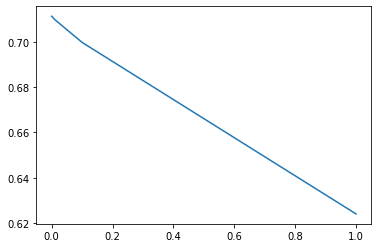

In [11]:
scores = ridge_func(valores_alpha, True)
plot_(valores_alpha, scores)

### b) Mostre o mesmo para normalize=False.

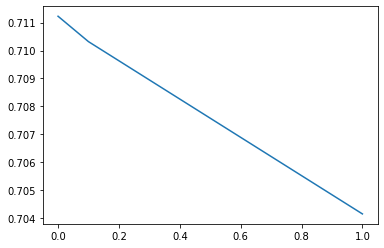

In [12]:
scores = ridge_func(valores_alpha, False)
plot_(valores_alpha, scores)

### c) Agora pegue os hiperparâmetros do melhor resultado que você obteve. Treine um novo modelo usando-os, mas mudando agora a quantidade de épocas (hiperparâmetro max_iter) para apenas 10 (o valor default é 1000). Qual o score R^2 sobre o conjunto de teste para o novo modelo?

In [13]:
ridge = Ridge(valores_alpha[0], False, max_iter=10)

ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)
ridge.score(X_test, y_test)

0.6662584640827722

### 3. Resolva o problema de classificação binária sobre o dataset "Pima Indians Diabetes Database". 

#### 1. Separe os dados em treino (80%) e teste (20%).

In [14]:
df = pd.read_csv('Lista-07/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [15]:
X = df.iloc[:, :8].values
y = df.iloc[:, 8].values

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

#### 2. Use o algoritmo LogisticRegression.

- Crie modelos usando diferentes regularizações: Nenhuma, L1, L2, ElasticNet (penalty : None, ‘l2’ or ‘l1’ or ‘elasticnet’).


#### l1

In [28]:
model1 = LogisticRegression(penalty='l1', solver='saga')
model1.fit(X_train, y_train)
model1.score(X_test, y_test)

0.6558441558441559

#### elasticnet

In [27]:
model2 = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5)
model2.fit(X_train, y_train)
model2.score(X_test, y_test)

0.6558441558441559

#### none

In [26]:
model3 = LogisticRegression()
model3.fit(X_train, y_train)
model3.score(X_test, y_test)

0.7142857142857143

#### l2

In [25]:
model4 = LogisticRegression(penalty='l2')
model4.fit(X_train, y_train)
model4.score(X_test, y_test)

0.7142857142857143